## **1. Top-10 Reviewer**

In [105]:
import pandas as pd
import numpy as np
data_path = "./Reviews.csv"
# read file
pd_data = pd.read_csv(data_path)
# choose first 10000 rows
pd_data = pd_data[:10000]

tr = pd_data.groupby(['UserId', 'ProfileName']).size().reset_index(name = 'Score count')
temp = pd_data.groupby(['UserId', 'ProfileName'])['Score']\
    .mean().reset_index(name = 'Score mean')
tr['Score mean'] = temp['Score mean']
tr = tr.sort_values('Score count', ascending = False)

tr.set_index(['UserId', 'ProfileName'], inplace=True)
print(tr[:10])

                                                           Score count  \
UserId         ProfileName                                               
A1Z54EM24Y40LL c2                                                   17   
A2SZLNSI5KOQJT Carrie, "Formerly &#34;Sister Carrie&#34;"           10   
A35R32TA60XD57 M. Torma                                              9   
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"                8   
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                      7   
A3NHUQ33CFH3VM Citizen John                                          7   
A3PJZ8TU8FDQ1K Jared Castle                                          7   
AQ6SHOW0VMZGF  K. Padgett "familyof5"                                6   
A26NFIQ7KWI8Y7 kt rose                                               6   
A10H24TDLK2VDP William Jens Jensen                                   6   

                                                           Score mean  
UserId         ProfileName             

## **2. Plot score distribution for the user with the most number of reviews**

/home/wayne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/home/wayne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  


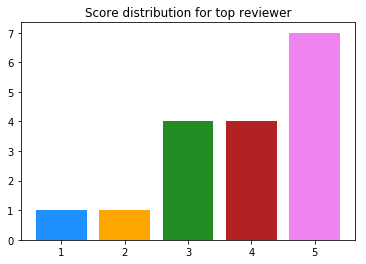

In [106]:
import matplotlib.pyplot as plt
temp = pd_data
temp.set_index(['UserId', 'ProfileName'], inplace=True)

x = pd.value_counts(temp.loc[tr.index[0]]['Score']).index
y = pd.value_counts(temp.loc[tr.index[0]]['Score']).values

plt.bar(x, y, color = ['violet', 'firebrick', 'forestgreen', 'orange' , 'dodgerblue'])
plt.title('Score distribution for top reviewer')
plt.show()

## **3. Plot pandas Series DataFrame (Time->Date)**

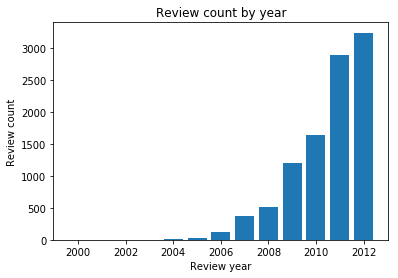

In [107]:
import math
date = (pd_data['Time']/60/60/24/365.25+1970).tolist()
Date = [int(i) for i in date]
x = pd.value_counts(Date).index
y = pd.value_counts(Date).values
plt.bar(x , y)
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title('Review count by year')
plt.show()

## **4. Plot HeatMap using seaborn**

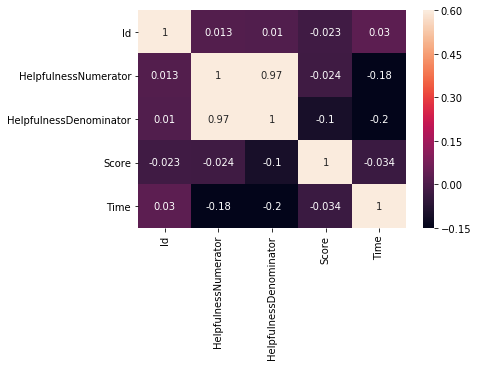

In [108]:
import seaborn as sns
data = pd.read_csv(data_path)[:10000]
data = data.drop(columns = ['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text']).corr()
sns.heatmap(data, annot = True, vmax = 0.6, vmin = -0.15)

## **5. Helpful percent**

(array([4878.,    0.,    0.,    0.,    0.,  689.,  225.,  422.,  317.,
        3469.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

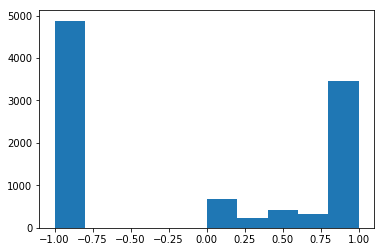

In [109]:
p = (pd_data['HelpfulnessNumerator']/pd_data['HelpfulnessDenominator']).tolist()
for i in range(len(p)):
    if math.isnan(p[i]):
        p[i] = -1
plt.hist(p)